<a href="https://colab.research.google.com/github/jacobletsinger/MAT422/blob/main/HW1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1.3

1.3.1. QR decomposition

1.3.2. Least-squares problems

1.3.3. Linear regression


### 1.3.1. QR decomposition

Any square matrix $M$ can be decomposed into two pieces, an orthogonal matrix $Q$ and an upper triangular matrix $R$.

\begin{equation}
  M = QR
\end{equation}

The matrix $Q$ is equal to the Gram-Schmidt orthogonalization of $M$ and by using $Q^T = Q^{-1}$, the matrix $R = Q^T M$. Numpy has a function to do this, but the following uses the Gram-Schmidt process from last week.

In [34]:
import numpy as np
import matplotlib.pyplot as plt


def projection(a,b):
  return np.multiply((np.dot(a,b) / (np.linalg.norm(a)**2)), a)

def gram_schmidt(A):
  V = np.float64(np.copy(A))
  U = np.float64(np.copy(A))

  for i in range(0, V.shape[1]):
    v = V[:,i]

    u = v
    for k in range(0,i):
      u -= projection(V[:,k],v)
    U[:,i] = u / np.linalg.norm(u)

  return U

def QR_decomp(A):
  Q = gram_schmidt(A)
  R = Q.T * A
  return Q, R


M = np.asmatrix(([3,2,0],[1,2,0],[0,0,1]))
Q, R = QR_decomp(M)

print(Q,"\n", R)
print(np.matmul(Q, R))

[[ 0.9486833  -0.31622777  0.        ]
 [ 0.31622777  0.9486833   0.        ]
 [ 0.          0.          1.        ]] 
 [[3.16227766e+00 2.52982213e+00 0.00000000e+00]
 [1.44328993e-15 1.26491106e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[3. 2. 0.]
 [1. 2. 0.]
 [0. 0. 1.]]


### 1.3.2. Least-squares problems
The least-squares problem is the problem of fitting a slope and y-intercept to a set of ordered pairs. It is the solution to the equation $Ax=b$ for a given matrix $A$ and vectors $x$ and $b$. Numpy has a function for solving this problem.

In [35]:
a = np.array(((1,0,1),(4,1,5),(0,0,-1)))
b = np.array((0,1,1))

least_squares = np.linalg.lstsq(a,b)
print(least_squares[0])

[ 1.  2. -1.]


<ipython-input-35-1fb1a350f322>:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  least_squares = np.linalg.lstsq(a,b)


### 1.3.3. Linear regression
Linear regression is the estimation of a set of data points with a linear fucntion. This is done using the solution least-squares problem.

<ipython-input-36-c39ec3a1395d>:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, c = np.linalg.lstsq(A, y)[0]


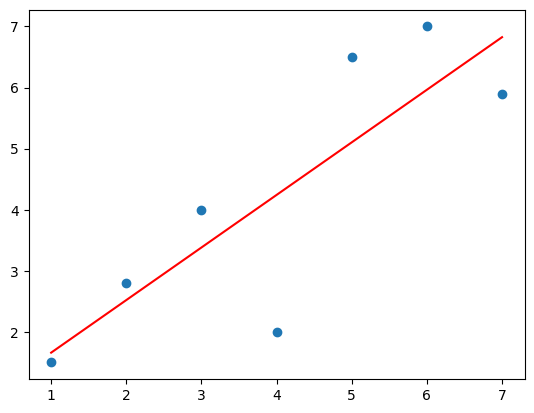

In [36]:
x = np.array(((1,2,3,4,5,6,7)))
y = np.array(((1.5,2.8,4,2,6.5,7,5.9)))

A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y)[0]

plt.scatter(x,y)
plt.plot(x, m*x + c, "-r")
